In [1]:
!pip3 install numpy==1.25

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
import tarfile
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
from mne import Epochs, find_events
import mne
from mne_connectivity import spectral_connectivity_epochs
import glob
#import eegraph

from mne import find_events
os.chdir('../..')
os.getcwd()
#sys.path.append('c:/users/pesylvestre/appdata/roaming/python/python310/site-packages')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'/home/vboxuser/Documents'

In [3]:
def eeg_to_epoch(path, event_id=dict(T=1), tmin=-0.2, tmax=0.8, picks='eeg'):
    #need a .vhdr
    
    with open(path, 'r') as file:
        filedata = file.read()
    filedata = filedata.replace(filedata[filedata.find("DataFile=")+len("DataFile="):
                                         filedata.find(".eeg")+1],
                                path.split("/")[-1].replace("vhdr", ""))
    with open(path, 'w') as file:
        file.write(filedata)
    raw = mne.io.read_raw_brainvision(path)
    #->
    raw.drop_channels("VEOG")
    montage = mne.channels.make_standard_montage("easycap-M1")
    print(montage)
    montage.plot()
    raw.set_montage(montage)
    #->
    raw.plot()
    raw.load_data()
    filt_raw = raw.copy().filter(0.1, 30, picks='eeg', method='iir', 
                             iir_params=dict(order=8, ftype='butter'), 
                             verbose=True)
    events = mne.events_from_annotations(filt_raw)
    epochs = mne.Epochs(filt_raw, events[0], event_id, tmin, tmax, 
                    picks=picks, baseline=(-0.2, 0), reject=None, preload=True)
    return epochs, events[0], events[1], raw, filt_raw

In [4]:
def tar_to_epoch(path, event_id=dict(T=1), tmin=-0.2, tmax=0.8, picks='eeg'):
    tar = tarfile.open(path)
    d = tar.getnames()
    print("->",os.getcwd())
    #print('/'.join(path.split("/")[0:-1]))
    tar.extractall(path='/'.join(path.split("/")[0:-1]))
    tar.close()
    print(d)
    return eeg_to_epoch(path.replace(d[0]+".tar.gz", '')+"\n".join(s for s in d if "vhdr" in s), event_id, tmin, tmax, picks)

-> /home/vboxuser/Documents
['sub-032301', 'sub-032301/RSEEG', 'sub-032301/RSEEG/sub-032301.vmrk', 'sub-032301/RSEEG/sub-032301.vhdr', 'sub-032301/RSEEG/sub-032301.eeg']
Extracting parameters from /home/vboxuser/Documents/In-HousePOC3/sub-032301/RSEEG/sub-032301.vhdr...
Setting channel info structure...
<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 74 channels>


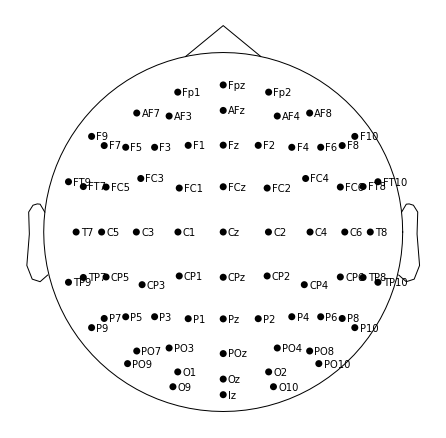

Using matplotlib as 2D backend.


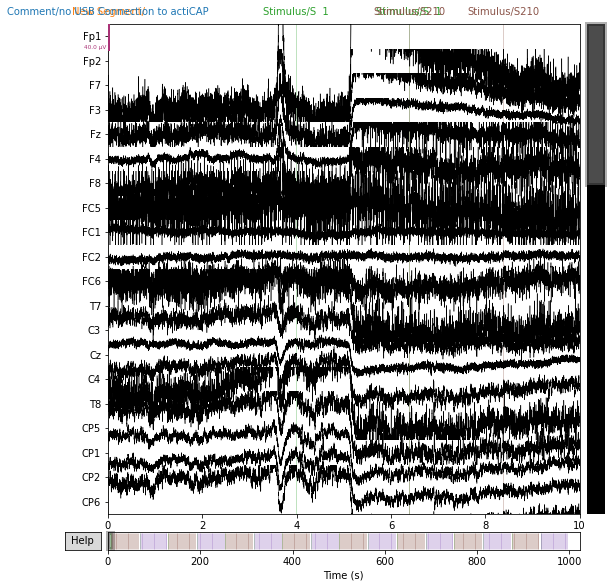

Reading 0 ... 2554999  =      0.000 ...  1022.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 32 (effective, after forward-backward)
- Cutoffs at 0.10, 30.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
Not setting metadata
480 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 480 events and 2501 original time points ...
0 bad epochs dropped


In [5]:
#Manualy download lemon data from : http://fcon_1000.projects.nitrc.org/indi/retro/MPI_LEMON/downloads/download_EEG.html
epv = tar_to_epoch("/home/vboxuser/Documents/In-HousePOC3/sub-032301.tar.gz", event_id=dict(eyesOpen=210, eyesClose=200))

In [6]:
res = spectral_connectivity_epochs(epv[0], fmin=9, fmax=11, faverage=True).get_data()[:, 0]
print(res)
res.shape

Adding metadata with 3 columns
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1830 connections
    using t=-0.200s..0.800s for estimation (2501 points)
    frequencies: 10.0Hz..11.0Hz (2 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Coherence
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivit

    computing connectivity for epoch 194
    computing connectivity for epoch 195
    computing connectivity for epoch 196
    computing connectivity for epoch 197
    computing connectivity for epoch 198
    computing connectivity for epoch 199
    computing connectivity for epoch 200
    computing connectivity for epoch 201
    computing connectivity for epoch 202
    computing connectivity for epoch 203
    computing connectivity for epoch 204
    computing connectivity for epoch 205
    computing connectivity for epoch 206
    computing connectivity for epoch 207
    computing connectivity for epoch 208
    computing connectivity for epoch 209
    computing connectivity for epoch 210
    computing connectivity for epoch 211
    computing connectivity for epoch 212
    computing connectivity for epoch 213
    computing connectivity for epoch 214
    computing connectivity for epoch 215
    computing connectivity for epoch 216
    computing connectivity for epoch 217
    computing co

    computing connectivity for epoch 394
    computing connectivity for epoch 395
    computing connectivity for epoch 396
    computing connectivity for epoch 397
    computing connectivity for epoch 398
    computing connectivity for epoch 399
    computing connectivity for epoch 400
    computing connectivity for epoch 401
    computing connectivity for epoch 402
    computing connectivity for epoch 403
    computing connectivity for epoch 404
    computing connectivity for epoch 405
    computing connectivity for epoch 406
    computing connectivity for epoch 407
    computing connectivity for epoch 408
    computing connectivity for epoch 409
    computing connectivity for epoch 410
    computing connectivity for epoch 411
    computing connectivity for epoch 412
    computing connectivity for epoch 413
    computing connectivity for epoch 414
    computing connectivity for epoch 415
    computing connectivity for epoch 416
    computing connectivity for epoch 417
    computing co

(3721,)

In [7]:
import numpy as np
import pandas as pd
from scipy import signal, stats
from scipy.stats import entropy
import antropy as ant
from abc import ABC, abstractmethod
import scot
from itertools import combinations
import networkx as nx
import plotly.graph_objects as go
import logging
import warnings

In [8]:
class Graph:
    
    def __init__(self):
        pass
        
    def is_directed(self):
        return None

    def is_multigraph(self):
        return None
    
    def load_data(self, path, exclude = [None],  electrode_montage_path = None):
        input_data = InputData(path, exclude)
        self.data = input_data.load()
        
        self.ch_names=self.data.ch_names
        if(electrode_montage_path):
            self.ch_names=input_data.set_montage(electrode_montage_path)
        
        input_data.display_info(self.ch_names)
        

    def modelate(self, window_size, connectivity, bands = [None], threshold = None):
        print('\033[1m' + 'Model Data.' + '\033[0m')
        print(search(connectivity_measures, connectivity))
        
        model_data = ModelData(self.data, self.ch_names, eval(search(connectivity_measures, connectivity)))  
        connectivity_matrix, G = model_data.connectivity_workflow(bands, window_size, threshold)
        
        return connectivity_matrix, G
        

    def visualize_html(self, graph, name, auto_open = True):
        fig = draw_graph(graph)
        fig.update_layout(title='', plot_bgcolor='white' ) 
        fig.write_html(str(name) + '_plot.html', auto_open=auto_open, default_height='100%', default_width='100%')
        
        
    def visualize_png(self, graph, name):
        fig = draw_graph(graph)
        fig.update_layout(title='', plot_bgcolor='white' ) 
        fig.write_image(str(name) + '.png', format='png',height=1000,width=1800)

In [9]:
class InputData:
    def __init__(self, path, exclude):
        self.path = path
        self.exclude = exclude
        
    def load(self):       
        #Split the path in two parts, left and right of the dot. 
        file_type = self.path.split(".")

        #https://mne.tools/0.17/manual/io.html
        #Check the extension of the file in the input format dictionary, and use the proper MNE method. 
        print("->", search_input(input_format, file_type[-1]))
        self.data = eval(search_input(input_format, file_type[-1]))
        
        return self.data
    
    def set_montage(self, electrode_montage_path):
        nodes = process_channel_names(self.data.ch_names)
        df = pd.read_csv(electrode_montage_path, delimiter= "\s+|;|:", engine='python')

        
        positions_number = []
        for column in df:
            counter = 0
            for item in list(df[column]):
                if(str(item) in nodes):
                    counter+=1
                    if(counter > 4):
                        positions_number = list(df[column])
        
        standard_electrodes = ['Cz', 'Pz', 'Oz', 'Fz', 'Nz']
        positions_labels = []
        for column in df:
            for item in list(df[column]):
                if(str(item) in standard_electrodes):
                    positions_labels = list(df[column])
            
        
        new_channel_names= []
        for node in nodes:
            for i in range(len(positions_number)):
                if(str(node) == str(positions_number[i])):
                    new_channel_names.append(positions_labels[i])
                
        return new_channel_names
        

    def display_info(self, ch_names):
        #Extract the raw_data and info with mne methods. 
        self.raw_data = self.data.get_data()
        self.info = self.data.info
        
        #Display information from the data. 
        print('\n\033[1m' + 'EEG Information.')
        print('\033[0m' + "Number of Channels:", self.info['nchan'])
        print("Sample rate:", self.info['sfreq'], "Hz.")
        print("Duration:", round(self.data.times.max(),3), "seconds.")
        print("Channel Names:", ch_names)

In [10]:
import networkx

input_format = {'edf': 'mne.io.read_raw_edf(self.path, exclude= self.exclude)', 'gdf': 'mne.io.read_raw_gdf(self.path, exclude= self.exclude)', 'vhdr': 'mne.io.read_raw_brainvision(self.path)',
               'cnt': 'mne.io.read_raw_cnt(self.path)', 'bdf': 'mne.io.read_raw_bdf(self.path, exclude= self.exclude)', 'egi': 'mne.io.read_raw_egi(self.path, exclude= self.exclude)', 
                'mff': 'mne.io.read_raw_egi(self.path, exclude= self.exclude)', 'nxe': 'mne.io.read_raw_eximia(self.path)',
                # 'eeg': 'mne.io.read_raw_nihon(self.path)' # FIXME: 'ascii' codec can't decode byte 0xc5 in position 3: ordinal not in range(128)
                }

connectivity_measures = {'cross_correlation': 'Cross_correlation_Estimator', 'pearson_correlation': 'Pearson_correlation_Estimator', 'squared_coherence': 'Squared_coherence_Estimator',
                         'imag_coherence': 'Imag_coherence_Estimator', 'corr_cross_correlation': 'Corr_cross_correlation_Estimator', 'wpli': 'Wpli_Estimator', 
                         'plv': 'Plv_Estimator', 'pli': 'Pli_No_Bands_Estimator', 'pli_bands': 'Pli_Bands_Estimator', 'dtf': 'Dtf_Estimator', 'power_spectrum': 'Power_spectrum_Estimator',
                         'spectral_entropy': 'Spectral_entropy_Estimator', 'shannon_entropy': 'Shannon_entropy_Estimator'}

def search_input(values, searchFor):
    for k in values:
        if (searchFor == k):
            return values[k]
    raise NameError('File extension ' + "'" + searchFor + "'" + ' is not supported.')
    
def search(values, searchFor):
    for k in values:
        if (searchFor == k):
            return (values[k] + '()')
    raise NameError('Connectivity Measure ' + "'" + searchFor + "'" + ' does not exist.')

def need_bands(bands):
    if (bands == [None]):
        raise NameError("Connectivity Measure requires frequency bands to be specified.")
        
        
def dont_need_bands(bands):
    if (bands != [None]):
        raise NameError("Connectivity Measure does not require frequency bands.")
        
def re_scaling(raw_data):
    df = pd.DataFrame(raw_data)
    df.sub(df.mean(axis=1), axis=0)
    scaled_data = df.to_numpy()

    return scaled_data


def process_channel_names(channel_names):
    """Process to obtain the electrode name from the channel name.
    Parameters
    ----------
    channel_names : list
        Channel names in the EEG.
    
    Returns
    -------
    channel_names : list
        Proccessed channel names, containing only the name of the electrode.
    """
    
    channel_names = [(elem.split())[-1] for elem in channel_names]
    channel_names = [(elem.replace("-", " ").split())[0] for elem in channel_names]
    
    return channel_names


def calculate_time_intervals(data, sample_rate, sample_duration, seconds, sample_length):
    """Process to split the data based on the window size or time intervals.
    Parameters
    ----------
    data : array
        Raw EEG signal; each row is one EEG channel, each column is data point.
    sample_rate : float
        Sample frequency used in the EEG (Hz). 
    sample_duration : float
        Duration of the EEG (seconds).
    seconds : int or list
        Can be of two types. int; a single value that determines the window size (seconds). list; a set of intervals, where each value is in (seconds). 
    
    Returns
    -------
    epochs : array
        Array containing the data points according to window size, the number of rows will be (Number of Channels X Intervals).
    steps : list
        List with the intervals, pairs of (Start, End) values in data points (seconds x sample frequency).
    """
    epochs = []
    
    #Obtain the steps using the time_stamps helper function. 
    steps, flag = time_stamps(seconds, sample_rate, sample_length, sample_duration)
    
    #Loop over the intervals.
    for i,_ in enumerate(steps):
        #loop over the number of rows.
        for j in range(len(data)):
            snippet = data[j][int(steps[i][0]):int(steps[i][1])]
            #Append the snippet 
            epochs.append(snippet)
    return np.array(epochs, dtype="object"), steps, flag
                
def time_stamps(seconds, sample_rate, sample_length, sample_duration):
    """Process to calculate the intervals based on the window size or time intervals.
    Parameters
    ----------
    seconds : int or list
        Can be of two types. int; a single value that determines the window size (seconds). list; a set of intervals, where each value is in (seconds).
    sample_rate : float
        Sample frequency used in the EEG (Hz).
    sample_length : float
        Sample length in data points (seconds x sample frequency).
    sample_duration : float
        Duration of the EEG (seconds).
    
    Returns
    -------
    intervals : list
        List with the intervals, pairs of (Start, End) values in data points (seconds x sample frequency).
    """
    
    intervals, i, flag = [] , 0, 0
    
    #If the input is a list, but only contains one value it is a window size. 
    if type(seconds) == list:
        if len(seconds) == 1:
            seconds = seconds[0]
        #If it is a list, and contains more than one value is a set of intervals. 
        else:
            #If the last interval is bigger than the sample duration raise Exception. 
            if seconds[-1] > (sample_duration).round():
                raise Exception("Error in Window size. Intervals exceeds sample length.")
            #First value of a ser of intervals must be 0. 
            if seconds[0] != 0:
                raise Exception("Error in Window size. First interval must be 0.")
            else:
                #Obtain the difference between the time intervals.
                diff = np.diff(seconds)
                #Loop over all the values in diff. 
                for j,value in enumerate(diff):
                    #Samples in the frame will be the result of the value of the difference in the first interval x sample frequency. 
                    samples_per_frame = (value * sample_rate)
                    #Append the pair (Start, End) for the interval.
                    intervals.append((i, i + samples_per_frame))
                    #The End will be the Start for the next step. 
                    i += samples_per_frame
    
    #If the input is int or float. 
    if type(seconds) == int or type(seconds) == float:
        #Samples in the frame will be the result of the window size x sample frequency.
        samples_per_frame = (seconds * sample_rate)
        
        #Loop over, adding the samples per frame until it is bigger than the sample length. 
        while i+samples_per_frame < sample_length:    
            #Append the pair (Start, End) for the interval.
            intervals.append((i,i+samples_per_frame))
            #The End will be the Start for the next step. 
            i = i + samples_per_frame
        
        #If the next time we add the samples per frame it is bigger than the sample length, append the remaining data points in a new interval. 
        #This new interval will not be the same size as the others. 
        if(i+samples_per_frame >= sample_length):
            intervals.append((i,sample_length))
    
    #Round the intervals for the printed output
    intervals_rounded = [(round(steps[0],2), round(steps[1],2)) for steps in intervals]
    print("Intervals: ", intervals_rounded)
    if (len(intervals) == 1):
        intervals.append((0, sample_rate))
        flag = 1
        
    return intervals, flag

def input_bands(bands):
    """Process to identify which bands does the user want to use.
    Parameters
    ----------
    bands : string
        String with the bands to use, separated by commas. 
        
    Returns
    -------
    wanted_bands : list
        Boolean list, with 5 positions one for each frequency band.
    """
    need_bands(bands)
    
    
    #Frequency bands.
    freq_bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']
    wanted_bands = []
    
    #Loop over all frequency bands, and append True if it is in the input bands, otherwise append False. 
    for elem in freq_bands:
        if elem in bands:
            wanted_bands.append(True)
        else:
            wanted_bands.append(False)

    print('Frequency Bands:', freq_bands, wanted_bands)
    return wanted_bands

def calculate_bands_fft(values, sample_rate, bands):
    """Process to calculate the numpy fft for the snippets.
    Parameters
    ----------
    values : array
        Snippet of values for the signal.
    sample_rate : float
        Sample frequency used in the EEG (Hz).
    
    Returns
    -------
    fft_freq : list
        Frequency bins for given FFT parameters.
    fft_vals : ndarray
        Values calculated with the Fast Fourier Transform.
    """
    bands_dict = {0: 'Delta', 1:'Theta', 2:'Alpha', 3:'Beta', 4:'Gamma'}
    
    fft_vals = np.fft.fft(values)
    fft_freq = np.fft.fftfreq(len(values), 1/sample_rate)

    
    bands_list = obtain_frequency_bands(fft_freq, fft_vals)
    output_bands = [None] * 5
    
    for x,band in enumerate(bands_list):
        if(len(band)<1):
            if(bands[x]):
                logging.warn(' Frequency band ' + bands_dict[x] + ' has no values. Either dont use this frequency band or use a bigger window size.')
                print('\n')
                output_bands[x] = np.real(np.fft.ifft(bands_list[x]))
            else:
                output_bands[x] = [0,0]
        else:
            output_bands[x] = np.real(np.fft.ifft(bands_list[x]))
            
    
    return output_bands[0], output_bands[1], output_bands[2], output_bands[3], output_bands[4]


def obtain_frequency_bands(f,Y):
    """Process to obtain the values for each frequency band.
    Parameters
    ----------
    f : list
        Frequency bins for given FFT parameters.
    Y : ndarray
        Array of values from which we divide into frequency bands. 
    
    Returns
    -------
    delta : array
        Array with values within the ranges of delta band.
    theta : array
        Array with values within the ranges of theta band.
    alpha : array
        Array with values within the ranges of alpha band.
    beta : array
        Array with values within the ranges of beta band.
    gamma : array
        Array with values within the ranges of gamma band.
    """
    
    delta_range = (1,4)
    theta_range = (4,8)
    alpha_range = (8,13)
    beta_range = (13,30)
    gamma_range = (30,45)
    
    delta = np.zeros(91, dtype='complex')
    theta = np.zeros(91, dtype='complex')
    alpha = np.zeros(91, dtype='complex')
    beta = np.zeros(91, dtype='complex')
    gamma = np.zeros(91, dtype='complex')
    
    delta[0] = Y[f==0]
    d_vals = Y[(f>=delta_range[0]) & (f<=delta_range[1])]
    delta[delta_range[0]:delta_range[0]+len(d_vals)] =  d_vals
    delta[91-len(d_vals):91] = Y[(f>=-delta_range[1]) & (f<=-delta_range[0])]
    
    theta[0] = Y[f==0]
    t_vals = Y[(f>=theta_range[0]) & (f<=theta_range[1])]
    theta[theta_range[0]:theta_range[0]+len(t_vals)] = t_vals
    theta[88-len(t_vals):88] = Y[(f>=-theta_range[1]) & (f<=-theta_range[0])]
    
    alpha[0] = Y[f==0]
    a_vals = Y[(f>=alpha_range[0]) & (f<=alpha_range[1])]
    alpha[alpha_range[0]:alpha_range[0]+len(a_vals)] = a_vals
    alpha[84-len(a_vals):84] = Y[(f>=-alpha_range[1]) & (f<=-alpha_range[0])]
    
    beta[0] = Y[f==0]
    b_vals = Y[(f>=beta_range[0]) & (f<=beta_range[1])]
    beta[beta_range[0]:beta_range[0]+len(b_vals)] = b_vals
    beta[79-len(b_vals):79] = Y[(f>=-beta_range[1]) & (f<=-beta_range[0])]
    
    gamma[0] = Y[f==0]
    g_val = Y[(f>=gamma_range[0]) & (f<=gamma_range[1])]
    gamma[gamma_range[0]:gamma_range[0]+len(g_val)] = g_val
    gamma[62-len(g_val):62] = Y[(f>=-gamma_range[1]) & (f<=-gamma_range[0])]
    
    
    return delta, theta, alpha, beta, gamma


def frequency_bands(f,Y):
    """Process to obtain the values for each frequency band.
    Parameters
    ----------
    f : list
        Frequency bins for given FFT parameters.
    Y : ndarray
        Array of values from which we divide into frequency bands. 
    
    Returns
    -------
    delta : array
        Array with values within the ranges of delta band.
    theta : array
        Array with values within the ranges of theta band.
    alpha : array
        Array with values within the ranges of alpha band.
    beta : array
        Array with values within the ranges of beta band.
    gamma : array
        Array with values within the ranges of gamma band.
    """
    
    delta_range = (1,4)
    theta_range = (4,8)
    alpha_range = (8,13)
    beta_range = (13,30)
    gamma_range = (30,45)
    
    delta = Y[(f>delta_range[0]) & (f<=delta_range[1])]
    theta = Y[(f>theta_range[0]) & (f<=theta_range[1])]
    alpha = Y[(f>alpha_range[0]) & (f<=alpha_range[1])]
    beta = Y[(f>beta_range[0]) & (f<=beta_range[1])]
    gamma = Y[(f>gamma_range[0]) & (f<=gamma_range[1])]

    return delta, theta, alpha, beta, gamma

def calculate_connectivity(data_intervals, steps, channels, sample_rate, connectivity):
    """Process to calulate the correlation matrix.
    Parameters
    ----------
    data_intervals : array
        Array containing the data points according to window size, the number of rows will be (Number of Channels X Intervals).
    steps : list
        List with the intervals, pairs of (Start, End) values in data points (seconds x sample frequency).
    channels: int
        Number of channels in the EEG.
    
    Returns
    -------
    matrix : ndarray
        Correlation matrix using cross correlation.
    """
    #Calculate the number of intervals and create the matrix. 
    intervals = (len(steps))
    matrix = np.zeros(shape=(intervals, channels, channels))
    start, stop = 0, channels
    
    #Loop over the number of intervals
    for k in range(intervals):
        #If there is more than one interval, the new start is the last stop and we calculate the new stop with the number of channels. 
        if k!=0:
            start = stop
            stop+= channels
        #Loop over all possible pairs of channels in the interval calculating the cross correlation coefficient and saving it in the correlation matrix. 
        for x,i in enumerate(range(start, stop)):
            for y,j in enumerate(range(start, stop)):
                matrix[k][x,y] = connectivity.calculate_conn(data_intervals, i, j, sample_rate, channels)

    if (connectivity.flag):
        aux = np.zeros(shape=(intervals-1, channels, channels))
        aux[0] = matrix[0, :, :]
        return aux
        
    return matrix

def calculate_connectivity_with_bands(data_intervals, steps, channels, sample_rate, connectivity, bands):
    #Calculate the number of bands, number of intervals and create the matrix. 
    num_bands = sum(bands)
    intervals = (len(steps))
    matrix = np.zeros(shape=((intervals * num_bands), channels, channels))
    start, stop = 0, channels
    
    #Loop over the number of intervals
    for k in range(intervals):
        #If there is more than one interval, the new start is the last stop and we calculate the new stop with the number of channels. 
        if k!=0:
            start = stop
            stop+= channels
        #Loop over 
        for x,i in enumerate(range(start, stop)):
            for y,j in enumerate(range(start, stop)):
                delta, theta, alpha, beta, gamma = connectivity.calculate_conn(data_intervals, i, j, sample_rate, channels, bands)
                r=0
                for z, item in enumerate ([delta, theta, alpha, beta, gamma]):
                    if bands[z]:

                        if isinstance(item, complex):
                            item = item.real
                            
                        matrix[(k * num_bands) + r][x,y] = item
                        r+=1
                        
    if (connectivity.flag):
        aux = matrix[:num_bands, :, :]
        return aux
    
    return matrix


def instantaneous_phase(bands):
    for i,item in enumerate(bands):
        #First obtain the analytical signal with hilbert transformation. 
        bands[i] = signal.hilbert(item)
        #The instantaneous phase can then simply be obtained as the angle between the real and imaginary part of the analytic signal
        bands[i] = np.angle(bands[i])
    return bands


def calculate_dtf(data_intervals, steps, channels, sample_rate, bands, flag):
    num_bands = sum(bands)
    intervals = (len(steps)) - flag
    matrix = np.zeros(shape=((intervals * num_bands), channels, channels))
    start, stop = 0, channels
    
    ws = scot.Workspace({'model_order': channels - 5}, reducedim = 'no_pca', nfft= int(sample_rate/2), fs = sample_rate)
    
    f = np.arange(0, int(sample_rate/2))
    
    #Loop over the number of intervals
    for k in range(intervals):
        #If there is more than one interval, the new start is the last stop and we calculate the new stop with the number of channels. 
        if k!=0:
            start = stop
            stop+= channels
            
        data = []
        for h in range(start, stop):
            data.append(data_intervals[h])
        
        ws.set_data(data)
        ws.do_mvarica()
        ws.fit_var()
        results = ws.get_connectivity('DTF')
        #Loop over 
        for x,i in enumerate(range(start, stop)):
            for y,j in enumerate(range(start, stop)):
                delta, theta, alpha, beta, gamma = frequency_bands(f, results[x][y])
                r=0
                for z, item in enumerate ([delta, theta, alpha, beta, gamma]):
                    if bands[z]:
                        if (len(item)!= 0):
                            matrix[(k * num_bands) + r][x,y] = item.mean()
                        else:
                            matrix[(k * num_bands) + r][x,y] = 0
                        r+=1                  
    return matrix

def calculate_connectivity_single_channel(data_intervals, sample_rate, connectivity):
    values = []
    intervals = len(data_intervals)
    
    if(connectivity.flag):
        intervals = int(len(data_intervals)/2)
    
    for i in range (intervals):
        values.append(connectivity.single_channel_conn(data_intervals[i], sample_rate))
    
    return values


def calculate_connectivity_single_channel_with_bands(data_intervals, sample_rate, connectivity, bands):
    values = []
    num_bands = sum(bands)
    intervals = len(data_intervals)
    if(connectivity.flag):
        intervals = int(len(data_intervals)/2)
    
    for i in range (intervals):
        delta, theta, alpha, beta, gamma = calculate_bands_fft(data_intervals[i], sample_rate, bands)
        
        for z,item in enumerate([delta, theta, alpha, beta, gamma]):
            if bands[z]:
                values.append(connectivity.single_channel_conn(item, sample_rate))
                
    return values


def make_graph(matrix, ch_names, threshold, directed = False):
    """Process to create the networkX graphs.
    Parameters
    ----------
    matrix : ndarray
        Matrix containing all the correlation matrix.
    ch_names : list
        Channel names in the EEG.
    """
    #The number of graphs will be the number of correlation matrixes. 
    num_graphs = len(matrix)
    print("Number of graphs created:", num_graphs)
    #Uses the helper function "process_channel_names" to obtain the names of the electrodes, to be used as nodes
    nodes = process_channel_names(ch_names)
    
    G = {}
    num_nodes = len(nodes)
    
    #Loop over the number of graphs, creating the nx Graph, adding the nodes (which will be the same in all graphs) and adding an edge if the connectivity measure is above the threshold.
    #Also we add a weight to the edge, to draw the edge´s size according to this value. It is the connectivity coefficient to a power, to really difference big from smaller coefficients. 
    for k in range(num_graphs):
        if(directed):
            G[k] = nx.DiGraph()
        else:
            G[k] = nx.Graph()
            
        G[k].add_nodes_from(nodes)
        for i in range(num_nodes):
            for j in range(num_nodes):
                if matrix[k][i,j] > threshold and i!=j:
                    #print("graph:",k,"Edge between:", i,j)
                    G[k].add_edge(nodes[i],nodes[j], thickness = pow(matrix[k][i,j], 3) * 6, weight = matrix[k][i,j])
    
    
    return G        

def single_channel_graph(data, ch_names, channels, percentage_threshold, bands=None):   
    matrix = []
    num_graphs = int(len(data)/channels)
    print("Number of graphs created:", num_graphs)
    nodes = process_channel_names(ch_names)
    percentile = 100 - (percentage_threshold*100)
    
    G = {}
    for i in range(num_graphs):
        G[i] = nx.Graph()
        G[i].add_nodes_from(nodes)
        elegible_nodes = []
        
        #Calculate the percentile of top channels channels for given percentage
        threshold = np.percentile(data[(i*channels):(((i+1)*channels)-1)], percentile)


        for j in range(channels):
            G[i].add_edge(nodes[j], nodes[j], weight = data[(channels * i) + j], thickness=1)
            if(data[(channels * i) + j]) >= threshold:
                elegible_nodes.append(nodes[j])
                
        edges = combinations(elegible_nodes,2)        
        G[i].add_edges_from(edges, weight = 1, thickness=1)
        matrix.append(nx.adjacency_matrix(G[i]).todense())
        
    return G, np.array(matrix)
        
        
def draw_graph(G):
    """Process to create the networkX graphs.
    Parameters
    ----------
    G : NetworkX graph
    """
    directed = nx.is_directed(G)
    
    #Dictionary with all the possible electrode positions. 
    
    pos = {'Cz': (0,0), 'C2h': (1.2,0), 'C2': (2.5,0), 'C4h': (3.85,0), 'C4': (5,0),'C6h': (6.20,0), 'C6': (7.6,0), 'T8h': (8.9,0), 'T8': (10.1,0), 'T10h': (11.3,0), 'T10': (12.75,0), 
           'C1h': (-1.2,0), 'C1': (-2.5,0), 'C3h': (-3.85,0), 'C3': (-5,0), 'C5h': (-6.20,0),'C5': (-7.6,0), 'T7h': (-8.9,0), 'T7': (-10.1,0), 'T9h': (-11.3,0), 'T9': (-12.75,0),
           
           'CCPz': (0, -0.95), 'CCP2h': (1.15,-0.96), 'CCP2': (2.4,-0.97), 'CCP4h': (3.8,-0.98), 'CCP4': (4.98,-0.99), 'CCP6h': (6.10,-1), 'CCP6': (7.45,-1.05),'TTP8h': (8.7,-1.10),
           'TTP8': (10, -1.15), 'TTP10h': (11.15,-1.25), 'TTP10': (12.5,-1.4), 'CCP1h': (-1.15,-0.96), 'CCP1': (-2.4,-0.97), 'CCP3h': (-3.8,-0.98), 'CCP3': (-4.98,-0.99), 
           'CCP5h': (-6.10,-1), 'CCP5': (-7.45,-1.05), 'TTP7h': (-8.7,-1.10), 'TTP7': (-10, -1.15), 'TTP9h': (-11.15,-1.25), 'TTP9': (-12.5,-1.4), 
           
           'CPz': (0, -1.80), 'CP2h': (1.1, -1.83), 'CP2': (2.35, -1.87), 'CP4h': (3.65, -1.93), 'CP4': (4.85, -1.96), 'CP6h': (6,-2), 'CP6': (7.2,-2.05), 'TP8h': (8.3, -2.10),  
           'TP8': (9.7, -2.20), 'TP10h': (10.8, -2.5), 'TP10': (12, -2.85), 'CP1h': (-1.1, -1.83), 'CP1': (-2.35, -1.87), 'CP3h': (-3.65, -1.93), 'CP3': (-4.85, -1.96),
           'CP5h': (-6,-2), 'CP5': (-7.2,-2.05), 'TP7h': (-8.3, -2.10), 'TP7': (-9.7, -2.20), 'TP9h': (-10.8, -2.5), 'TP9': (-12, -2.85), 
           
           'CPPz': (0, -2.70), 'CPP2h': (1.10, -2.75), 'CPP2': (2.20, -2.80), 'CPP4h': (3.45, -2.85), 'CPP4': (4.55, -2.92), 'CPP6h': (5.65, -2.98), 'CPP6': (6.9, -3.05),
           'TPP8h': (7.95, -3.12), 'TPP8': (9, -3.20), 'TPP10h': (10.1, -3.8), 'TPP10': (11.2, -4.05), 'CPP1h': (-1.10, -2.75), 'CPP1': (-2.20, -2.80), 'CPP3h': (-3.45, -2.85), 
           'CPP3': (-4.55, -2.92), 'CPP5h': (-5.65, -2.98), 'CPP5': (-6.9, -3.05),'TPP7h': (-7.95, -3.12), 'TPP7': (-9, -3.20), 'TPP9h': (-10.1, -3.8), 'TPP9': (-11.2, -4.05),
           
           'Pz': (0, -3.6), 'P2h': (1, -3.63), 'P2': (2.05, -3.68), 'P4h': (3.05, -3.75), 'P4': (4.05, -3.83), 'P6h': (5.05, -3.91), 'P6': (6.1, -4), 'P8h': (7.10, -4.08), 
           'P8': (8.10, -4.17), 'P10h': (9.15, -4.85), 'P10': (10.15, -5.25), 'P1h': (-1, -3.63), 'P1': (-2.05, -3.68), 'P3h': (-3.05, -3.75), 'P3': (-4.05, -3.83), 
           'P5h': (-5.05, -3.91), 'P5': (-6.1, -4), 'P7h': (-7.10, -4.08), 'P7': (-8.10, -4.17), 'P9h': (-9.15, -4.85), 'P9': (-10.15, -5.25),
           
           'PPOz': (0, -4.5), 'PPO2h': (0.98, -4.54), 'PPO2': (1.90, -4.61), 'PPO4h': (2.8, -4.68), 'PPO4': (3.7, -4.75), 'PPO6h': (4.5, -4.82), 'PPO6': (5.3, -4.90), 
           'PPO8h': (6.2, -4.98), 'PPO8': (7.05, -5.05), 'PPO10h': (8, -5.75), 'PPO10': (8.95, -6.3), 'PPO1h': (-0.98, -4.54), 'PPO1': (-1.90, -4.61), 'PPO3h': (-2.8, -4.68), 
           'PPO3': (-3.7, -4.75), 'PPO5h': (-4.5, -4.82), 'PPO5': (-5.3, -4.90), 'PPO7h': (-6.2, -4.98), 'PPO7': (-7.05, -5.05), 'PPO9h': (-8, -5.75), 'PPO9': (-8.95, -6.3),
           
           'POz': (0, -5.4), 'PO2h': (0.8, -5.4), 'PO2': (1.5, -5.43), 'PO4h': (2.2, -5.48), 'PO4': (3, -5.53), 'PO6h': (3.75, -5.6), 'PO6': (4.4, -5.67), 'PO8h': (5.1, -5.74), 
           'PO8': (5.98, -5.81), 'PO10h': (6.8, -6.6), 'PO10': (7.4, -7.3), 'PO1h': (-0.8, -5.4), 'PO1': (-1.5, -5.43), 'PO3h': (-2.2, -5.48), 'PO3': (-3, -5.53), 
           'PO5h': (-3.75, -5.6), 'PO5': (-4.4, -5.67), 'PO7h': (-5.1, -5.74), 'PO7': (-5.98, -5.81), 'PO9h': (-6.8, -6.6), 'PO9': (-7.4, -7.3),
           
           'POOz': (0, -6.2), 'POO2': (1.1, -6.22), 'POO4': (2.2, -6.25), 'POO6': (3.4, -6.28), 'POO8': (4.6, -6.32), 'POO10h': (5.1, -7.1), 'POO10': (5.8, -8.05), 
           'POO1': (-1.1, -6.22), 'POO3': (-2.2, -6.25), 'POO5': (-3.4, -6.28), 'POO7': (-4.6, -6.32), 'POO9h': (-5.1, -7.1), 'POO9': (-5.8, -8.05),
           
           'Oz': (0, -7.2), 'O2h': (1.6, -7.1), 'O2': (3.15, -6.85), 'O1h': (-1.6, -7.1), 'O1': (-3.15, -6.85),
           
           'Olz': (0, -8.05), 'Ol2h': (1.6, -8), 'Ol2': (3.5, -7.75), 'Ol1h': (-1.6, -8), 'Ol1': (-3.5, -7.75), 
           
           'lz': (0, -9.05), 'l2h': (1.98, -8.95), 'l2': (3.85, -8.6), 'l1h': (-1.98, -8.95), 'l1': (-3.85, -8.6),
           
           'FCCz': (0, 0.95), 'FCC2h': (1.15,0.96), 'FCC2': (2.4, 0.97), 'FCC4h': (3.8, 0.98), 'FCC4': (4.98, 0.99), 'FCC6h': (6.10, 1), 'FCC6': (7.45, 1.05),'FTT8h': (8.7, 1.10),
           'FTT8': (10, 1.15), 'FTT10h': (11.15, 1.25), 'FTT10': (12.5, 1.4), 'FCC1h': (-1.15, 0.96), 'FCC1': (-2.4, 0.97), 'FCC3h': (-3.8, 0.98), 'FCC3': (-4.98, 0.99), 
           'FCC5h': (-6.10, 1), 'FCC5': (-7.45, 1.05), 'FTT7h': (-8.7, 1.10), 'FTT7': (-10, 1.15), 'FTT9h': (-11.15, 1.25), 'FTT9': (-12.5, 1.4), 
           
           'FCz': (0, 1.80), 'FC2h': (1.1, 1.83), 'FC2': (2.35, 1.87), 'FC4h': (3.65, 1.93), 'FC4': (4.85, 1.96), 'FC6h': (6, 2), 'FC6': (7.2, 2.05), 'FT8h': (8.3, 2.10),  
           'FT8': (9.7, 2.20), 'FT10h': (10.8, 2.5), 'FT10': (12, 2.85), 'FC1h': (-1.1, 1.83), 'FC1': (-2.35, 1.87), 'FC3h': (-3.65, 1.93), 'FC3': (-4.85, 1.96),
           'FC5h': (-6,2), 'FC5': (-7.2,2.05), 'FT7h': (-8.3, 2.10), 'FT7': (-9.7, 2.20), 'FT9h': (-10.8, 2.5), 'FT9': (-12, 2.85), 
           
           'FFCz': (0, 2.70), 'FFC2h': (1.10, 2.75), 'FFC2': (2.20, 2.80), 'FFC4h': (3.45, 2.85), 'FFC4': (4.55, 2.92), 'FFC6h': (5.65, 2.98), 'FFC6': (6.9, 3.05),
           'FFT8h': (7.95, 3.12), 'FFT8': (9, 3.20), 'FFT10h': (10.1, 3.8), 'FFT10': (11.2, 4.05), 'FFC1h': (-1.10, 2.75), 'FFC1': (-2.20, 2.80), 'FFC3h': (-3.45, 2.85), 
           'FFC3': (-4.55, 2.92), 'FFC5h': (-5.65, 2.98), 'FFC5': (-6.9, 3.05),'FFT7h': (-7.95, 3.12), 'FFT7': (-9, 3.20), 'FFT9h': (-10.1, 3.8), 'FFT9': (-11.2, 4.05),
           
           'Fz': (0, 3.6), 'F2h': (1, 3.63), 'F2': (2.05, 3.68), 'F4h': (3.05, 3.75), 'F4': (4.05, 3.83), 'F6h': (5.05, 3.91), 'F6': (6.1, 4), 'F8h': (7.10, 4.08), 
           'F8': (8.10, 4.17), 'F10h': (9.15, 4.85), 'F10': (10.15, 5.25), 'F1h': (-1, 3.63), 'F1': (-2.05, 3.68), 'F3h': (-3.05, 3.75), 'F3': (-4.05, 3.83), 
           'F5h': (-5.05, 3.91), 'F5': (-6.1, 4), 'F7h': (-7.10, 4.08), 'F7': (-8.10, 4.17), 'F9h': (-9.15, 4.85), 'F9': (-10.15, 5.25),
           
           'AFFz': (0, 4.5), 'AFF2h': (0.98, 4.54), 'AFF2': (1.90, 4.61), 'AFF4h': (2.8, 4.68), 'AFF4': (3.7, 4.75), 'AFF6h': (4.5, 4.82), 'AFF6': (5.3, 4.90), 
           'AFF8h': (6.2, 4.98), 'AFF8': (7.05, 5.05), 'AFF10h': (8, 5.75), 'AFF10': (8.95, 6.3), 'AFF1h': (-0.98, 4.54), 'AFF1': (-1.90, 4.61), 'AFF3h': (-2.8, 4.68), 
           'AFF3': (-3.7, 4.75), 'AFF5h': (-4.5, 4.82), 'AFF5': (-5.3, 4.90), 'AFF7h': (-6.2, 4.98), 'AFF7': (-7.05, 5.05), 'AFF9h': (-8, 5.75), 'AFF9': (-8.95, 6.3),
           
           'AFz': (0, 5.4), 'AF2h': (0.8, 5.4), 'AF2': (1.5, 5.43), 'AF4h': (2.2, 5.48), 'AF4': (3, 5.53), 'AF6h': (3.75, 5.6), 'AF6': (4.4, 5.67), 'AF8h': (5.1, 5.74), 
           'AF8': (5.98, 5.81), 'AF10h': (6.8, 6.6), 'AF10': (7.4, 7.3), 'AF1h': (-0.8, 5.4), 'AF1': (-1.5, 5.43), 'AF3h': (-2.2, 5.48), 'AF3': (-3, 5.53), 
           'AF5h': (-3.75, 5.6), 'AF5': (-4.4, 5.67), 'AF7h': (-5.1, 5.74), 'AF7': (-5.98, 5.81), 'AF9h': (-6.8, 6.6), 'AF9': (-7.4, 7.3),
           
           'AFpz': (0, 6.2), 'AFp2': (1.1, 6.22), 'AFp4': (2.2, 6.25), 'AFp6': (3.4, 6.28), 'AFp8': (4.6, 6.32), 'AFp10h': (5.1, 7.1), 'AFp10': (5.8, 8.05), 
           'AFp1': (-1.1, 6.22), 'AFp3': (-2.2, 6.25), 'AFp5': (-3.4, 6.28), 'AFp7': (-4.6, 6.32), 'AFp9h': (-5.1, 7.1), 'AFp9': (-5.8, 8.05),
           
           'Fpz': (0, 7.2), 'Fp2h': (1.6, 7.1), 'Fp2': (3.15, 6.85), 'Fp1h': (-1.6, 7.1), 'Fp1': (-3.15, 6.85),
           
           'NFpz': (0, 8.05), 'NFp2h': (1.6, 8), 'NFp2': (3.5, 7.75), 'NFp1h': (-1.6, 8), 'NFp1': (-3.5, 7.75), 
           
           'Nz': (0, 9.05), 'N2h': (1.98, 8.95), 'N2': (3.85, 8.6), 'N1h': (-1.98, 8.95), 'N1': (-3.85, 8.6),
           
           'T3': (-10.1,0), 'T4': (10.1,0), 'T5': (-8.10, -4.17), 'T6': (8.10, -4.17)
          }
    
    nx.set_node_attributes(G, pos, 'pos')
    nodes = G.nodes()
    unwanted_nodes = []
    
    for node in nodes:
        if (node not in pos):
            warnings.warn("Channel with label '" + node + "' is not a recognized electrode position. It will be ignored for visualization.")
            unwanted_nodes.append(node)
            
    for node in unwanted_nodes:
        G.remove_node(node)
        
    nodes = G.nodes()
    edges = G.edges()
    
    visibility = []
    for i in edges:
        visibility.append(True)
    visibility.append(True)
    visibility.append(True)
    visibility.append(False)

    # convert to plotly graph
    edge_trace, eweights_trace_hover, eweights_trace_markers  = get_edge_trace(G)
    node_trace = get_node_trace(G)

    fig = go.Figure(data=(edge_trace + [node_trace,  eweights_trace_hover, eweights_trace_markers]),
                    layout=go.Layout(
                        titlefont_size=16,
                        showlegend=False,
                        margin=dict(b=40, l=0, r=350, t=30),
                        xaxis_visible=False,
                        yaxis_visible=False),
                    )
    
    fig.update_layout(updatemenus=[dict(
                                        type = "buttons",
                                        direction = "left",
                                        buttons=list([
                                            dict(
                                                args=[{"visible": visibility}],
                                                label="Hide edge markers",
                                                method="restyle"
                                            ),
                                            dict(
                                                args=[{"visible":[1]}],
                                                label="Show edge markers",
                                                method="restyle"
                                            )]))])
    
    if directed:
        edges_control = []
        for i,edge in enumerate(edges):
            x0, y0 = G.nodes[edge[0]]['pos']
            x1, y1 = G.nodes[edge[1]]['pos']
            
            #If there is another edge between the same nodes in the opposite direction
            if edge in edges_control:
                x0= x0 - 0.05
                y0= y0 + 0.05
                x1= x1 - 0.05
                y1= y1 + 0.05
                
            fig.add_annotation(
                ax=x0, ay=y0, axref='x', ayref='y',x=x1, y=y1, xref='x', yref='y', showarrow=True, arrowhead=1, arrowsize=2, standoff = 22, startstandoff = 15, opacity= 0.8
            )
            #We add the edge in the opposite direction to control edges between the same nodes
            edges_control.append((edge[1],edge[0]))
    return fig
    
    
def get_edge_trace(G):
    etext = [f'weight: {"{:.2f}".format(w)}' for w in list(nx.get_edge_attributes(G, 'weight').values())]
    xtext, ytext, edges_control = [], [], []
    
    edges = G.edges()
    weights = [G[u][v]['weight'] for u,v in edges]
    thickness = [G[u][v]['thickness'] for u,v in edges]
    
    edge_traces = {}
    
    for i, edge in enumerate (G.edges()):  
        edge_x = []
        edge_y = []
        
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        
        #If there is another edge between the same nodes in the opposite direction
        if edge in edges_control:
            x0= x0 - 0.05
            y0= y0 + 0.05
            x1= x1 - 0.05
            y1= y1 + 0.05

        xtext.append((x0+x1)/2)
        ytext.append((y0+y1)/2)
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
        width = thickness[i]

        #We add the edge in the opposite direction to control edges between the same nodes
        edges_control.append((edge[1],edge[0]))
        
        edge_traces['trace_' + str(i)] = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=width, color='#000'),
        mode='lines',
        hoverinfo='skip',
        )
    
    edge_trace = list(edge_traces.values())
    
    eweights_trace_hover = go.Scatter(x=xtext,y= ytext, mode='markers',
                              marker_size=0.5,
                              text= etext,
                              hoverlabel=dict(bgcolor='lightblue'),
                              hovertemplate='%{text}<extra></extra>')
    
    eweights_trace_markers = go.Scatter(x=xtext,y= ytext, mode='markers',
                                marker = dict( size=8, color='black'),
                                hoverinfo='none',
                                visible=False)
                        
    
    return edge_trace, eweights_trace_hover, eweights_trace_markers


def get_node_trace(G):
    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = G.nodes[node]['pos']
        node_x.append(x)
        node_y.append(y)

    labels = [str(node) for node in G.nodes()]
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers + text',
        marker = dict( size=40 , color='lightskyblue', line=dict(color='#000', width=1)),
        text=labels,
        hoverinfo='none',
        textfont=dict(size=14)
            )

    return node_trace

    

In [11]:
from abc import ABC, abstractmethod

class Strategy(ABC):
    
    @abstractmethod
    def calculate_connectivity_workflow(self):
        pass  


    def make_graph_workflow(self, data):
        pass


#Concrete Strategies, Workflows. 
class Connectivity_No_Bands(Strategy):
    def calculate_connectivity_workflow(self, data, bands, window_size):
        dont_need_bands(bands)
        data_intervals, steps, self.flag = calculate_time_intervals(data.raw_data, data.sample_rate, data.sample_duration, window_size, data.sample_length)
        self.connectivity_matrix = calculate_connectivity(data_intervals, steps, data.num_channels, data.sample_rate, self)
        
        return self.connectivity_matrix
    
    def make_graph_workflow(self, data):
        G = make_graph(self.connectivity_matrix, data.ch_names, data.threshold)
    
        return G
    
class Connectivity_With_Bands(Strategy):
    def calculate_connectivity_workflow(self, data , bands, window_size):
        self.bands = input_bands(bands)
        data_intervals, steps, self.flag = calculate_time_intervals(data.raw_data, data.sample_rate, data.sample_duration, window_size, data.sample_length)
        self.connectivity_matrix = calculate_connectivity_with_bands(data_intervals, steps, data.num_channels, data.sample_rate, self, self.bands)
        
        return self.connectivity_matrix

    def make_graph_workflow(self, data):
        G = make_graph(self.connectivity_matrix, data.ch_names, data.threshold)
    
        return G
    
class Connectivity_single_channel_With_Bands(Strategy):
    def calculate_connectivity_workflow(self, data, bands, window_size):       
        self.bands = input_bands(bands)
        data_intervals, steps, self.flag = calculate_time_intervals(data.raw_data, data.sample_rate, data.sample_duration, window_size, data.sample_length)
        self.connectivity_matrix = calculate_connectivity_single_channel_with_bands(data_intervals, data.sample_rate, self, self.bands)
        
        return self.connectivity_matrix

    def make_graph_workflow(self, data):
        G, c_m = single_channel_graph(self.connectivity_matrix, data.ch_names, data.num_channels, data.threshold, self.bands)
    
        return (G, c_m)
    
class Connectivity_single_channel_No_Bands(Strategy):
    def calculate_connectivity_workflow(self, data, bands, window_size):
        dont_need_bands(bands)
        data_intervals, steps, self.flag = calculate_time_intervals(data.raw_data, data.sample_rate, data.sample_duration, window_size, data.sample_length)
        self.connectivity_matrix = calculate_connectivity_single_channel(data_intervals, data.sample_rate, self)
        
        return self.connectivity_matrix

    def make_graph_workflow(self, data):
        G, c_m = single_channel_graph(self.connectivity_matrix, data.ch_names, data.num_channels, data.threshold)
    
        return (G, c_m)
    
class Cross_correlation_rescaled(Strategy):
    def calculate_connectivity_workflow(self, data, bands, window_size):
        dont_need_bands(bands)
        scaled_data = re_scaling(data.raw_data)
        data_intervals, steps, self.flag = calculate_time_intervals(scaled_data, data.sample_rate, data.sample_duration, window_size, data.sample_length)
        self.connectivity_matrix = calculate_connectivity(data_intervals, steps, data.num_channels, data.sample_rate, self)
        
        return self.connectivity_matrix
        
    def make_graph_workflow(self, data):
        G = make_graph(self.connectivity_matrix, data.ch_names, data.threshold)
    
        return G
    
class Dtf_With_Bands(Strategy):
    def calculate_connectivity_workflow(self, data, bands, window_size):
        self.bands = input_bands(bands)
        data_intervals, steps, self.flag = calculate_time_intervals(data.raw_data, data.sample_rate, data.sample_duration, window_size, data.sample_length)
        self.connectivity_matrix = calculate_dtf(data_intervals, steps, data.num_channels, data.sample_rate, self.bands, self.flag)
        
        return self.connectivity_matrix

    def make_graph_workflow(self, data):
        G = make_graph(self.connectivity_matrix, data.ch_names, data.threshold, True)
    
        return G
        
        
#Connectivity measures            
class Cross_correlation_Estimator(Cross_correlation_rescaled):
    def __init__(self):
        self.threshold = 0.5
        
    def calculate_conn(self, data_intervals, i, j, sample_rate, channels):
        x = data_intervals[i]
        y = data_intervals[j]
        
        Rxy = signal.correlate(x,y, 'full')
        Rxx = signal.correlate(x,x, 'full')
        Ryy = signal.correlate(y,y, 'full')
        
        lags = np.arange(-len(data_intervals[i]) + 1, len(data_intervals[i]))
        lag_0 = int((np.where(lags==0))[0])

        Rxx_0 = Rxx[lag_0]
        Ryy_0 = Ryy[lag_0]
        
        Rxy_norm = (1/(np.sqrt(Rxx_0*Ryy_0)))* Rxy
        
        #We use the mean from lag 0 to a 10% displacement. 
        disp = round((len(data_intervals[i])) * 0.10)

        cc_coef = Rxy_norm[lag_0: lag_0 + disp].mean()
        
        return cc_coef
        

class Pearson_correlation_Estimator(Connectivity_No_Bands):
    def __init__(self):
        self.threshold = 0.7
        
    def calculate_conn(self, data_intervals, i, j, sample_rate, channels):
        r, p_value = (stats.pearsonr(data_intervals[i],data_intervals[j]))
        
        return r

class Squared_coherence_Estimator(Connectivity_With_Bands):
    def __init__(self):
        self.threshold = 0.65
        
    def calculate_conn(self, data_intervals, i, j, sample_rate, channels, bands):
        f, Cxy = (signal.coherence(data_intervals[i], data_intervals[j], sample_rate))
        
        delta, theta, alpha, beta, gamma = frequency_bands(f, Cxy)
        
        return delta.mean(), theta.mean(), alpha.mean(), beta.mean(), gamma.mean()
    
class Imag_coherence_Estimator(Connectivity_With_Bands):
    def __init__(self):
        self.threshold = 0.4
        
    def calculate_conn(self, data_intervals, i, j, sample_rate, channels, bands):
        _, Pxx = signal.welch(data_intervals[i], fs=sample_rate)
        _, Pyy = signal.welch(data_intervals[j], fs=sample_rate)
        f, Pxy = signal.csd(data_intervals[i],data_intervals[j],fs=sample_rate)
        icoh = np.imag(Pxy)/(np.sqrt(Pxx*Pyy))
        
        delta, theta, alpha, beta, gamma = frequency_bands(f, icoh)
        
        return delta.mean(), theta.mean(), alpha.mean(), beta.mean(), gamma.mean()
    
class Corr_cross_correlation_Estimator(Cross_correlation_rescaled):
    def __init__(self):
        self.threshold = 0.1
        
    def calculate_conn(self, data_intervals, i, j, sample_rate, channels):
        x = data_intervals[i]
        y = data_intervals[j]
        
        Rxy = signal.correlate(x,y, 'full')
        Rxx = signal.correlate(x,x, 'full')
        Ryy = signal.correlate(y,y, 'full')
        
        lags = np.arange(-len(data_intervals[i]) + 1, len(data_intervals[i]))
        lag_0 = int((np.where(lags==0))[0])

        Rxx_0 = Rxx[lag_0]
        Ryy_0 = Ryy[lag_0]
        
        Rxy_norm = (1/(np.sqrt(Rxx_0*Ryy_0)))* Rxy
        negative_lag = Rxy_norm[:lag_0]
        positive_lag = Rxy_norm[lag_0 + 1:]
        
        corCC = positive_lag - negative_lag
        
        #We use the mean from lag 0 to a 10% displacement. 
        disp = round((len(data_intervals[i])) * 0.10)
        
        corCC_coef = corCC[:disp].mean()
        
        return corCC_coef    
    
class Wpli_Estimator(Connectivity_With_Bands):
    def __init__(self):
        self.threshold = 0.45
        
    def calculate_conn(self, data_intervals, i, j, sample_rate, channels, bands):
        f, Pxy = signal.csd(data_intervals[i],data_intervals[j],fs=sample_rate)
        
        delta, theta, alpha, beta, gamma = frequency_bands(f, Pxy)
        
        delta_denominator = np.mean(abs(np.imag(delta)))
        theta_denominator = np.mean(abs(np.imag(theta)))
        alpha_denominator = np.mean(abs(np.imag(alpha)))
        beta_denominator = np.mean(abs(np.imag(beta)))
        gamma_denominator = np.mean(abs(np.imag(gamma)))
        
        
        if(delta_denominator):
            wpli_delta = abs(np.mean(abs(np.imag(delta)) * np.sign(np.imag(delta)))) / (np.mean(abs(np.imag(delta))))
        else:
            wpli_delta = 0
            
        if(theta_denominator):
            wpli_theta = abs(np.mean(abs(np.imag(theta)) * np.sign(np.imag(theta)))) / (np.mean(abs(np.imag(theta))))
        else:
            wpli_theta = 0
           
        if(alpha_denominator):           
            wpli_alpha = abs(np.mean(abs(np.imag(alpha)) * np.sign(np.imag(alpha)))) / (np.mean(abs(np.imag(alpha)))) 
        else:
            wpli_alpha = 0
           
        if(beta_denominator): 
            wpli_beta = abs(np.mean(abs(np.imag(beta)) * np.sign(np.imag(beta)))) / (np.mean(abs(np.imag(beta))))
        else:
            wpli_beta = 0
           
        if(gamma_denominator):
            wpli_gamma = abs(np.mean(abs(np.imag(gamma)) * np.sign(np.imag(gamma)))) / (np.mean(abs(np.imag(gamma))))
        else:
            wpli_gamma = 0
           
        return wpli_delta, wpli_theta, wpli_alpha, wpli_beta, wpli_gamma
    
class Plv_Estimator(Connectivity_With_Bands):
    def __init__(self):
        self.threshold = 0.8
        
    def calculate_conn(self, data_intervals, i, j, sample_rate, channels, bands):
        sig1_delta, sig1_theta, sig1_alpha, sig1_beta, sig1_gamma = calculate_bands_fft(data_intervals[i], sample_rate, bands)
        sig2_delta, sig2_theta, sig2_alpha, sig2_beta, sig2_gamma = calculate_bands_fft(data_intervals[j], sample_rate, bands)
        
        sig1_bands = instantaneous_phase([sig1_delta, sig1_theta, sig1_alpha, sig1_beta, sig1_gamma])
        sig2_bands = instantaneous_phase([sig2_delta, sig2_theta, sig2_alpha, sig2_beta, sig2_gamma])
        
        complex_phase_diff_delta = np.exp(complex(0,1)*(sig1_bands[0] - sig2_bands[0]))
        complex_phase_diff_theta = np.exp(complex(0,1)*(sig1_bands[1] - sig2_bands[1]))
        complex_phase_diff_alpha = np.exp(complex(0,1)*(sig1_bands[2] - sig2_bands[2]))
        complex_phase_diff_beta = np.exp(complex(0,1)*(sig1_bands[3] - sig2_bands[3]))
        complex_phase_diff_gamma = np.exp(complex(0,1)*(sig1_bands[4] - sig2_bands[4]))
        
        plv_delta = np.abs(np.sum(complex_phase_diff_delta))/len(sig1_bands[0])
        plv_theta = np.abs(np.sum(complex_phase_diff_theta))/len(sig1_bands[1])
        plv_alpha = np.abs(np.sum(complex_phase_diff_alpha))/len(sig1_bands[2])
        plv_beta = np.abs(np.sum(complex_phase_diff_beta))/len(sig1_bands[3])
        plv_gamma = np.abs(np.sum(complex_phase_diff_gamma))/len(sig1_bands[4])
        
        return plv_delta, plv_theta, plv_alpha, plv_beta, plv_gamma
        
class Pli_Bands_Estimator(Connectivity_With_Bands):
    def __init__(self):
        self.threshold = 0.1
        
    def calculate_conn(self, data_intervals, i, j, sample_rate, channels, bands):
        sig1_delta, sig1_theta, sig1_alpha, sig1_beta, sig1_gamma = calculate_bands_fft(data_intervals[i], sample_rate, bands)
        sig2_delta, sig2_theta, sig2_alpha, sig2_beta, sig2_gamma = calculate_bands_fft(data_intervals[j], sample_rate, bands)
        
        sig1_bands = instantaneous_phase([sig1_delta, sig1_theta, sig1_alpha, sig1_beta, sig1_gamma])
        sig2_bands = instantaneous_phase([sig2_delta, sig2_theta, sig2_alpha, sig2_beta, sig2_gamma])
        
        phase_diff_delta = sig1_bands[0] - sig2_bands[0]
        phase_diff_delta = (phase_diff_delta + np.pi) % (2 * np.pi) - np.pi
        
        phase_diff_theta = sig1_bands[1] - sig2_bands[1]
        phase_diff_theta = (phase_diff_theta + np.pi) % (2 * np.pi) - np.pi
        
        phase_diff_alpha = sig1_bands[2] - sig2_bands[2]
        phase_diff_alpha = (phase_diff_alpha + np.pi) % (2 * np.pi) - np.pi
        
        phase_diff_beta = sig1_bands[3] - sig2_bands[3]
        phase_diff_beta  = (phase_diff_beta  + np.pi) % (2 * np.pi) - np.pi
        
        phase_diff_gamma = sig1_bands[4] - sig2_bands[4]
        phase_diff_gamma  = (phase_diff_gamma  + np.pi) % (2 * np.pi) - np.pi
        
        pli_delta = abs(np.mean(np.sign(phase_diff_delta)))
        pli_theta = abs(np.mean(np.sign(phase_diff_theta)))
        pli_alpha = abs(np.mean(np.sign(phase_diff_alpha)))
        pli_beta = abs(np.mean(np.sign(phase_diff_beta)))
        pli_gamma = abs(np.mean(np.sign(phase_diff_gamma)))
        
        return pli_delta, pli_theta, pli_alpha, pli_beta, pli_gamma
    
class Pli_No_Bands_Estimator(Connectivity_No_Bands):
    def __init__(self):
        self.threshold = 0.1
        
    def calculate_conn(self, data_intervals, i, j, sample_rate, channels):
        sig1_phase = instantaneous_phase([data_intervals[i]])
        sig2_phase = instantaneous_phase([data_intervals[j]])
        phase_diff = sig1_phase[0] - sig2_phase[0]
        phase_diff = (phase_diff  + np.pi) % (2 * np.pi) - np.pi
        pli = abs(np.mean(np.sign(phase_diff)))
        
        return pli
    
class Power_spectrum_Estimator(Connectivity_single_channel_With_Bands):
    def __init__(self):
        self.threshold = 0.25            #<----- 25%
        
    #https://www.kite.com/python/answers/how-to-plot-a-power-spectrum-in-python
    def single_channel_conn(self, data, sample_rate):
        fourier_transform = np.fft.rfft(data)
        abs_fourier_transform = np.abs(fourier_transform)
        power_spectrum = np.square(abs_fourier_transform)
        return power_spectrum.mean()    
    
class Spectral_entropy_Estimator(Connectivity_single_channel_With_Bands):
    def __init__(self):
        self.threshold = 0.25            #<----- 25%
        
    #https://raphaelvallat.com/antropy/build/html/generated/antropy.spectral_entropy.html#antropy.spectral_entropy
    def single_channel_conn(self, data, sample_rate):
        nperseg = len(data)
        se = ant.spectral_entropy(data, sample_rate, method='welch', nperseg = nperseg, normalize=True)
        return se
    
class Shannon_entropy_Estimator(Connectivity_single_channel_No_Bands):
    def __init__(self):
        self.threshold = 0.25            #<----- 25%
        
    #https://www.kite.com/python/answers/how-to-calculate-shannon-entropy-in-python
    def single_channel_conn(self, data, sample_rate):
        pd_series = pd.Series(data)
        counts = pd_series.value_counts()
        she = entropy(counts)
        return she

class Dtf_Estimator(Dtf_With_Bands):
    def __init__(self):
        self.threshold = 0.3

In [12]:
#Class that uses the Strategy Abstract class
class ModelData: 
    def __init__(self, data, ch_names, strategy: Strategy):
        self.raw_data = data.get_data()
        self.ch_names = ch_names
        self.num_channels = data.info['nchan']
        self.sample_rate = data.info['sfreq']
        self.sample_duration = data.times.max()
        self.sample_length = self.sample_rate * self.sample_duration
        self._strategy = strategy
        self.threshold = self._strategy.threshold
        
    def connectivity_workflow(self, bands, window_size, threshold):
        #If the user assigns a new threshold
        if(threshold) is not None:
            self.threshold = threshold
            
        self.connectivity_matrix = self._strategy.calculate_connectivity_workflow(self, bands, window_size)
        print('\nThreshold:', self.threshold)
        
        out = self._strategy.make_graph_workflow(self)
        if(type(out) is tuple):
            self.connectivity_graphs = out[0]
            self.connectivity_matrix = out[1]
        else:
            self.connectivity_graphs = out

        return self.connectivity_graphs, self.connectivity_matrix
        
    

In [13]:
G = Graph()
G.load_data(path="/home/vboxuser/Documents/In-HousePOC3/sub-032301/RSEEG/sub-032301.vhdr")

-> mne.io.read_raw_brainvision(self.path)
Extracting parameters from /home/vboxuser/Documents/In-HousePOC3/sub-032301/RSEEG/sub-032301.vhdr...
Setting channel info structure...

EEG Information.
Number of Channels: 62
Sample rate: 2500.0 Hz.
Duration: 1022.0 seconds.
Channel Names: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'VEOG', 'CP5', 'CP1', 'CP2', 'CP6', 'AFz', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'FT7', 'FC3', 'FC4', 'FT8', 'C5', 'C1', 'C2', 'C6', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8']


In [14]:
graphs, connectivity_matrix = G.modelate(window_size = 2, connectivity = 'pearson_correlation')

Model Data.
Pearson_correlation_Estimator()
Intervals:  [(0, 5000.0), (5000.0, 10000.0), (10000.0, 15000.0), (15000.0, 20000.0), (20000.0, 25000.0), (25000.0, 30000.0), (30000.0, 35000.0), (35000.0, 40000.0), (40000.0, 45000.0), (45000.0, 50000.0), (50000.0, 55000.0), (55000.0, 60000.0), (60000.0, 65000.0), (65000.0, 70000.0), (70000.0, 75000.0), (75000.0, 80000.0), (80000.0, 85000.0), (85000.0, 90000.0), (90000.0, 95000.0), (95000.0, 100000.0), (100000.0, 105000.0), (105000.0, 110000.0), (110000.0, 115000.0), (115000.0, 120000.0), (120000.0, 125000.0), (125000.0, 130000.0), (130000.0, 135000.0), (135000.0, 140000.0), (140000.0, 145000.0), (145000.0, 150000.0), (150000.0, 155000.0), (155000.0, 160000.0), (160000.0, 165000.0), (165000.0, 170000.0), (170000.0, 175000.0), (175000.0, 180000.0), (180000.0, 185000.0), (185000.0, 190000.0), (190000.0, 195000.0), (195000.0, 200000.0), (200000.0, 205000.0), (205000.0, 210000.0), (210000.0, 215000.0), (215000.0, 220000.0), (220000.0, 225000.0), 


Threshold: 0.7
Number of graphs created: 511


In [18]:
print(len(graphs))

511


In [15]:
G.visualize_html(graphs[0], 'graph_1')

/tmp/ipykernel_4226/3882968617.py:641: UserWarning: Channel with label 'VEOG' is not a recognized electrode position. It will be ignored for visualization.
  warnings.warn("Channel with label '" + node + "' is not a recognized electrode position. It will be ignored for visualization.")


In [16]:
#print(G.is_directed())
nx.is_directed(G)

In [17]:
nx.clustering(graphs[0])

{'Fp1': 0.3333333333333333,
 'Fp2': 0.4666666666666667,
 'F7': 0,
 'F3': 0,
 'Fz': 0.4666666666666667,
 'F4': 0,
 'F8': 0,
 'FC5': 0,
 'FC1': 0,
 'FC2': 1.0,
 'FC6': 1.0,
 'T7': 0,
 'C3': 0.3,
 'Cz': 0,
 'C4': 0.5,
 'T8': 1.0,
 'CP5': 0.4444444444444444,
 'CP1': 0.6,
 'CP2': 0.7121212121212122,
 'CP6': 0.6818181818181818,
 'AFz': 0.5333333333333333,
 'P7': 0.7142857142857143,
 'P3': 0.6373626373626373,
 'Pz': 0.6029411764705882,
 'P4': 0.7575757575757576,
 'P8': 0.7032967032967034,
 'PO9': 1.0,
 'O1': 0.6,
 'Oz': 0.5714285714285714,
 'O2': 0.7111111111111111,
 'PO10': 1.0,
 'AF7': 0,
 'AF3': 1.0,
 'AF4': 1.0,
 'AF8': 0,
 'F5': 0,
 'F1': 0,
 'F2': 0.6,
 'F6': 0,
 'FT7': 0,
 'FC3': 0,
 'FC4': 0.3,
 'FT8': 0,
 'C5': 1.0,
 'C1': 0.6666666666666666,
 'C2': 1.0,
 'C6': 0.26666666666666666,
 'TP7': 1.0,
 'CP3': 0.6071428571428571,
 'CPz': 0.8,
 'CP4': 0.8222222222222222,
 'TP8': 1.0,
 'P5': 0.6794871794871795,
 'P1': 0.6263736263736264,
 'P2': 0.6,
 'P6': 0.7032967032967034,
 'PO7': 0.6363636